# Introduction to numerical analysis: modelling a badminton shuttlecock


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython
from scipy import integrate
%matplotlib nbagg

## Data collection

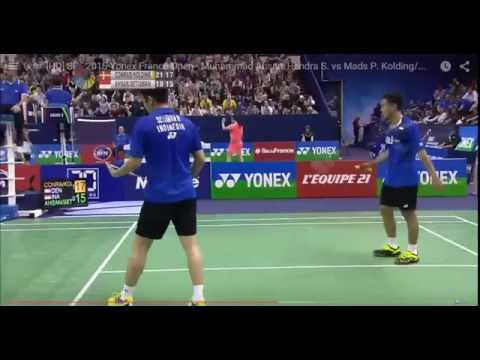

In [2]:
IPython.display.YouTubeVideo("wy5UraBy5co")

Further reading:

* Badminton physics: http://www.worldbadminton.com/reference/documents/5084354.pdf
* Drag coefficient: https://en.wikipedia.org/wiki/Drag_coefficient

Simulation inputs:

In [3]:
v0  = 493. / 3.6 # Initial velocity [m/s]
A   = 4.e-3      # Shuttlecock cross area [m**2]
cx  = .62        # Drag coefficient []
m   = 4.e-2      # Shuttlecock mass [kg]
rho = 1.225      # Air density [kg/m**3]
g   = 9.81       # Gravity [m/s**2]


## Can we simulate the trajectory ?

### Newton's second law:

$$
m \vec{A}(M/R) = -mg \vec y -\frac{1}{2} \rho V^2 A c_x \vec T
$$



In [4]:
def derivative(X, t):
    """
    Target ODE: Newton's second law
    """
    x, y, vx, vy = X
    v = (vx**2 + vy**2)**.5
    Tx, Ty = vx / v, vy / v
    ax = -.5 * rho * v**2 * A * cx * Tx / m
    ay = -.5 * rho * v**2 * A * cx * Ty / m - g
    return np.array([vx, vy, ax, ay])


x0, y0 = 0., 0.
theta0 = 45.
X0 = [x0, y0, v0* np.cos(np.radians(theta0)), v0* np.sin(np.radians(theta0))]
t = np.linspace(0., 10., 200)
sol = integrate.odeint(derivative, X0, t)
out = pd.DataFrame(sol, columns = ["x", "y", "vx", "vy"])    
out.head()  

    

,x,y,vx,vy
0,0.000000,0.000000,96.834345,96.834345
1,4.323421,4.311938,76.793616,76.351638
2,7.831625,7.788303,63.660684,62.843454
3,10.785471,10.692467,54.394327,53.238940
4,13.337946,13.178880,47.510084,46.039129


<IPython.core.display.Javascript object>


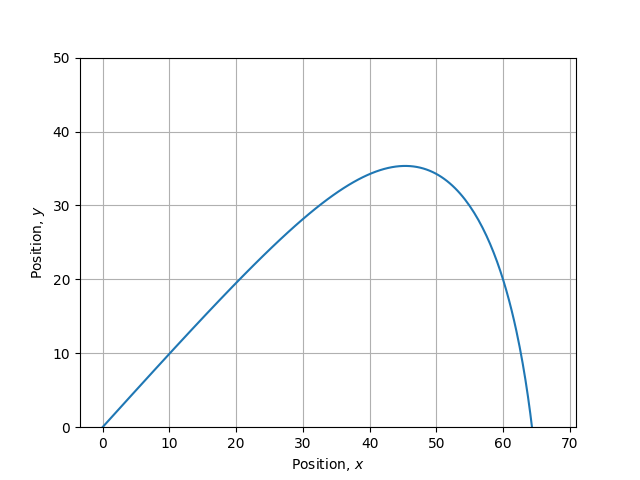

In [5]:
plt.figure()
plt.plot(out.x, out.y)
plt.grid()
plt.ylim(0., 50.)
plt.xlabel("Position, $x$")
plt.ylabel("Position, $y$")
plt.show()

<IPython.core.display.Javascript object>


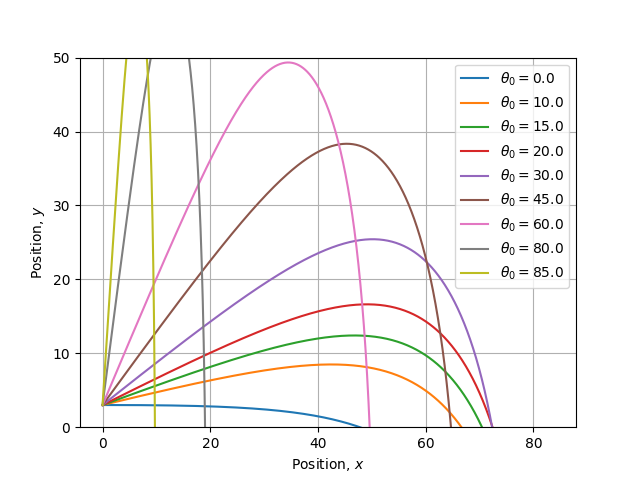

In [13]:
thetas = [0., 10.,15., 20., 30., 45., 60., 80., 85.]
plt.figure()

for theta0 in thetas:
    x0, y0 = 0., 3.
    X0 = [x0, y0, v0* np.cos(np.radians(theta0)), v0* np.sin(np.radians(theta0))]
    t = np.linspace(0., 10., 1000)
    sol = integrate.odeint(derivative, X0, t)
    out = pd.DataFrame(sol, columns = ["x", "y", "vx", "vy"])
    out["t"] = t
    plt.plot(out.x, out.y, label = r"$\theta_0 = $" + "{0}".format(theta0))
plt.legend()    
plt.grid()
plt.ylim(0., 50.)
plt.xlabel("Position, $x$")
plt.ylabel("Position, $y$")
plt.show()    

## Range as a function of $\theta$

In [45]:
%%time
thetas = np.linspace(-180., 180., 300)
xmax = np.zeros_like(thetas)


for i in range(len(thetas)):
    theta0 = thetas[i]
    x0, y0 = 0., 3.
    X0 = [x0, y0, v0* np.sin(np.radians(theta0)), -v0* np.cos(np.radians(theta0))]
    t = np.linspace(0., 10., 10000)
    sol = integrate.odeint(derivative, X0, t)
    out = pd.DataFrame(sol, columns = ["x", "y", "vx", "vy"])
    xmax[i] = out[out.y < 0.].iloc[0].x

CPU times: user 1.64 s, sys: 0 ns, total: 1.64 s
Wall time: 1.64 s


<IPython.core.display.Javascript object>


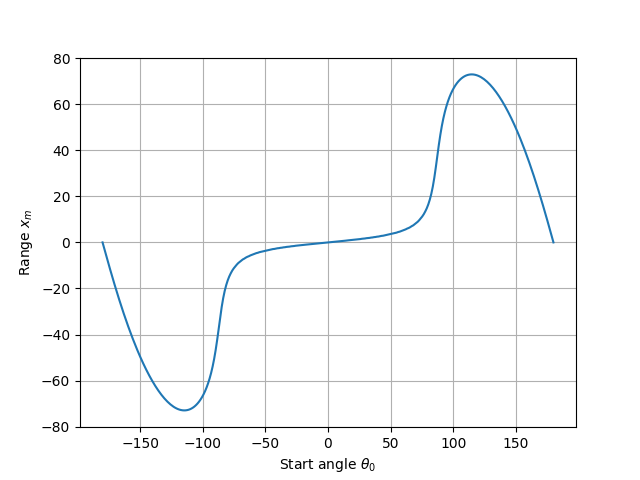

In [46]:
plt.figure()
plt.plot(thetas, xmax)
plt.grid()
plt.xlabel(r"Start angle $\theta_0$")
plt.ylabel(r"Range $x_m$")
plt.show()